# **Financial Market News Sentiment Analysis**

-------------

## **Objective**

Develop a predictive model to classify financial news articles into positive or negative sentiment categories and assess its impact on financial markets. This involves preprocessing the text data, extracting features, and training a classifier.

## **Data Source**

This is a data (dummy) of Financial Market top 25 news for the day. There are 4101 dates recorded with each having top 25 news in variables News1, News2, ...., News25 and a Label binary variable which has the classification.

## **Import Library**

In [42]:
import pandas as pd
import numpy as np

## **Import Data**

In [43]:
df=pd.read_csv(r'https://github.com/YBIFoundation/Dataset/raw/main/Financial%20Market%20News.csv',encoding='latin')

## **Describe Data**

In [44]:
df

,Date,Label,News 1,News 2,News 3,News 4,News 5,News 6,News 7,News 8,...,News 16,News 17,News 18,News 19,News 20,News 21,News 22,News 23,News 24,News 25
0,01-01-2010,0,McIlroy's men catch cold from Gudjonsson,Obituary: Brian Walsh,Workplace blues leave employers in the red,Classical review: Rattle,Dance review: Merce Cunningham,Genetic tests to be used in setting premiums,Opera review: La Bohème,Pop review: Britney Spears,...,Finland 0 - 0 England,Healy a marked man,Happy birthday Harpers & Queen,Win unlimited access to the Raindance film fes...,Labour pledges £800m to bridge north-south divide,Wales: Lib-Lab pact firm despite resignation,Donald Dewar,Regenerating homes regenerates well-being in ...,Win £100 worth of underwear,TV guide: Random views
1,02-01-2010,0,Warning from history points to crash,Investors flee to dollar haven,Banks and tobacco in favour,Review: Llama Farmers,War jitters lead to sell-off,Your not-so-secret history,Review: The Northern Sinfonia,Review: Hysteria,...,Why Wenger will stick to his Gunners,Out of luck England hit rock bottom,Wilkinson out of his depth,Kinsella sparks Irish power play,Brown banished as Scots rebound,Battling Wales cling to lifeline,Ehiogu close to sealing Boro move,Man-to-man marking,Match stats,French referee at centre of storm is no strang...
2,03-01-2010,0,Comment: Why Israel's peaceniks feel betrayed,Court deals blow to seizure of drug assets,An ideal target for spooks,World steps between two sides intent on war,What the region's papers say,Comment: Fear and rage in Palestine,Poverty and resentment fuels Palestinian fury,Republican feud fear as dissident is killed,...,FTSE goes upwardly mobile,At this price? BP Amoco,Go fish,Bosnian Serb blows himself up to evade law,Orange float delayed to 2001,"Angry factory workers root out fear, favours a...",Smith defied advice on dome payout,Xerox takes the axe to jobs,Comment: Refugees in Britain,Maverick who sparked the new intifada
3,04-01-2010,1,"£750,000-a-goal Weah aims parting shot",Newcastle pay for Fletcher years,Brown sent to the stands for Scotland qualifier,Tourists wary of breaking new ground,Canary Wharf climbs into the FTSE 100,Review: Bill Bailey,Review: Classical,Review: New Contemporaries 2000,...,More cash on way for counties,Cairns carries Kiwis to victory,Year of Blanchflower's flourish when Spurs sto...,New direct approach brings only pay-per-blues,Third Division round-up,Second Division round-up,First Division round-up,McLean ends his career with a punch,Heskey grabs triple crown,Weah on his way as City march on
4,05-01-2010,1,Leeds arrive in Turkey to the silence of the fans,One woman's vision offers loan lifeline,Working Lives: How world leaders worked,Working Lives: Tricks of the trade,"Working Lives: six-hour days, long lunches and...",Pop review: We Love UK,World music review: Marisa Monte,Art review: Hollingsworth/Heyer,...,Duisenberg in double trouble,Pru to cut pension charges,Art review: Paul Graham,Shearer shot sparks Boro humiliation,Ridsdale's lingering fears as Leeds revisit Tu...,Champions League: Rangers v Galatasaray,Champions League: Lazio v Arsenal,Lazio 1 - 1 Arsenal,England in Pakistan,England given olive-branch reception
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4096,20-03-2021,0,Barclays and RBS shares suspended from trading...,Pope says Church should ask forgiveness from g...,Poland 'shocked' by xenophobic abuse of Poles ...,"There will be no second referendum, cabinet ag...","Scotland welcome to join EU, Merkel ally says",Sterling dips below Friday's 31-year low amid ...,No negative news about South African President...,Surge in Hate Crimes in the U.K. Following U.K...,...,German lawyers to probe Erdogan over alleged w...,"Boris Johnson says the UK will continue to ""in...",Richard Branson is calling on the UK governmen...,Turkey 'sorry for downing Russian jet',Edward Snowden lawyer vows new push for pardon...,Brexit opinion poll reveals majority

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4101 entries, 0 to 4100
Data columns (total 27 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     4101 non-null   object
 1   Label    4101 non-null   int64 
 2   News 1   4101 non-null   object
 3   News 2   4101 non-null   object
 4   News 3   4101 non-null   object
 5   News 4   4101 non-null   object
 6   News 5   4101 non-null   object
 7   News 6   4101 non-null   object
 8   News 7   4101 non-null   object
 9   News 8   4101 non-null   object
 10  News 9   4101 non-null   object
 11  News 10  4101 non-null   object
 12  News 11  4101 non-null   object
 13  News 12  4101 non-null   object
 14  News 13  4101 non-null   object
 15  News 14  4101 non-null   object
 16  News 15  4101 non-null   object
 17  News 16  4101 non-null   object
 18  News 17  4101 non-null   object
 19  News 18  4101 non-null   object
 20  News 19  4101 non-null   object
 21  News 20  4101 non-null   object
 22  

In [46]:
df.shape

(4101, 27)

## **Data Visualization**

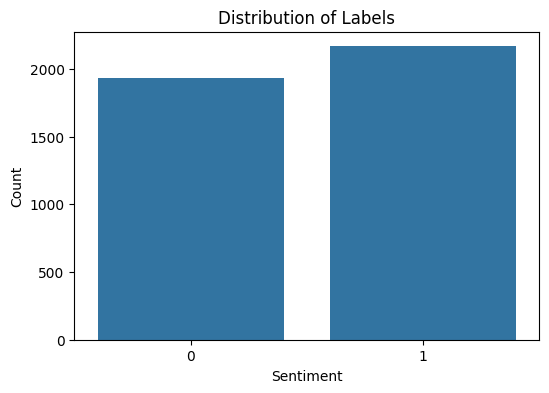

In [47]:
# Plot the distribution of labels to understand the balance of the dataset

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='Label', data=df)
plt.title('Distribution of Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


## **Data Preprocessing**

In [48]:
news=[]
for i in range(0,4101):
  news.append(' '.join(str(x) for x in df.iloc[i,2:27]))

In [49]:
news[0]

"McIlroy's men catch cold from Gudjonsson Obituary: Brian Walsh Workplace blues leave employers in the red Classical review: Rattle Dance review: Merce Cunningham Genetic tests to be used in setting premiums Opera review: La Bohème Pop review: Britney Spears Theatre review: The Circle Wales face a fraught night Under-21  round-up Smith off to blot his copybook Finns taking the mickey Praise wasted as Brown studies injury options Ireland wary of minnows Finland 0 - 0 England Healy a marked man Happy birthday Harpers & Queen Win unlimited access to the Raindance film festival Labour pledges £800m to bridge north-south divide Wales: Lib-Lab pact firm despite resignation Donald Dewar Regenerating homes  regenerates well-being in people Win £100 worth of underwear TV guide: Random views"

## **Define Target Variable (y) and Feature Variables (X)**

In [50]:
x=news

In [51]:
#Feature text conversion to bag of words

from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(lowercase=True,ngram_range=(1,1))
x=cv.fit_transform(x)
x

<4101x48527 sparse matrix of type '<class 'numpy.int64'>'
	with 872946 stored elements in Compressed Sparse Row format>

In [52]:
x.shape

(4101, 48527)

In [53]:
y=df['Label']

In [54]:
y.shape

(4101,)

## **Train Test Split**

In [74]:
from sklearn.model_selection import train_test_split

In [84]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)

## **Modeling**

In [85]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
rf=RandomForestClassifier(n_estimators=100)

## **Model Evaluation**

In [87]:
rf.fit(x_train, y_train)

RandomForestClassifier()

## **Prediction**

In [88]:
y_pred=rf.predict(x_test)

In [89]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [90]:
confusion_matrix(y_test, y_pred)

array([[128, 248],
       [109, 336]])

In [91]:
accuracy_score(y_test, y_pred)

0.5651644336175395

In [92]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.34      0.42       376
           1       0.58      0.76      0.65       445

    accuracy                           0.57       821
   macro avg       0.56      0.55      0.54       821
weighted avg       0.56      0.57      0.55       821



## **Explanation**

1. Introduction and Setup

*   The project starts with understanding the goal of the sentiment analysis, which involves predicting the sentiment of financial market news.
*   Essential libraries are imported, including pandas, numpy, sklearn.

2. Data Loading, Preprocessing, Feature Extraction

* The data is read from a CSV file into a pandas DataFrame. It is a collection of financial news headlines along with their sentiment labels.
* The text data is preprocessed, including steps such as removing punctuation, converting to lowercase, tokenization etc.
* All individual features are embedded together and appended to a list.
* This preprocessed feature text is converted to bag of words using CountVectorizer which helps in quantifying the importance of words in the context of the corpus.

3. Splitting Data

* Train-Test Split: The dataset is split into training and testing sets using train_test_split from sklearn.model_selection.

4. Model Training & Prediction

* A Random Forest Classifier model from sklearn.ensemble is instantiated with 100 estimators and trained on the training data. The model is fitted to the training data using the fit method.
* The trained model is used to predict the sentiments of the test data.

5. Evaluation

* Confusion Matrix: The confusion matrix shows the number of true positives, true negatives, false positives, and false negatives. It is generated to evaluate the performance of the model.
* Classification Report: Precision, recall, f1-score, and support metrics are calculated and displayed using classification_report. It rovides a detailed evaluation of the model's performance across different metrics.
* Accuracy: It indicates the percentage of correct predictions out of all predictions made. The overall accuracy of the model is computed.

**Conclusion:**
The project successfully demonstrates the process of building a sentiment analysis model using financial news data. The Random Forest Classifier provides a reasonable accuracy of 57%, but it can be improved further by hyperparameter tuning, trying different models, or enhancing the text preprocessing pipeline.